<a href="https://colab.research.google.com/github/Sohom-172/Personality-Detection-SoC/blob/Week-3/Week3_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering 

### What is the need?
Let's say you want to build a search engine. To do that you will need to find a pattern between pages and see if two pages/ searches are related.  
Do you think regression or classification would be of any help?  

### What is clustering?
It is an unsupervised learning algorithm, that helps us finds patterns in data. It trys to finds data which is similar to each other.  

### What is unsupervised learning?
In unsupervised learning we let the computer learn by itself. Remember how we had given labels (like the type of iris or if an email is a spam or not) to data in classification. In unsupervised learning there are no labels, i.e., we don't know if the email is spam or not, we are just given the email.


The algorithm we will be looking at is called **k-means**. The algorithm is explained [here](https://www.youtube.com/watch?v=hDmNF9JG3lo&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN&index=77)  
Let's see a simple implementation from scratch.  

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def k_means(k, data1, noIter=500):
    data = data1.values
    n = len(data)
    index = np.random.randint(0, n, size= (k,1))
    centroids = []
    
    for x in index:
        centroids.extend(data[x][:])
    
    centroids = np.array(centroids)
    
#   Instead of looping through all points and finding the distance from each centroid we can do this    
    distances = cdist(data, centroids ,'euclidean')
    
#   Using the distance to find the closest centroid    
    points_ = [] 
    for distance in distances:
        temp = min(distance)
        res = [i for i, j in enumerate(distance) if j == temp]
        points_.append(res[0])
    
    points = np.array(points_)
#       a shoter way of find the minimum distance from each centroid 
#     points = np.array([np.argmin(i) for i in distances])
    
    for _ in range(noIter): 
        centroids = []
        
        for index in range(k):
            # data[points == index] gives us all the points that are closest to the centroid (labelled as index)
            # .mean() is used to find the mean of the points, axis=0 means along the column, i.e., the points get 
            # added
            temp_cent = data[points==index].mean(axis=0) 
            centroids.append(temp_cent)
            
        centroids = np.array(centroids)
        distances = cdist(data, centroids ,'euclidean')

        
        points_=[]
        for distance in distances:
            temp = min(distance)
            res = [i for i, j in enumerate(distance) if j == temp]
            points_.append(res[0])
        points = np.array(points_) 
    return points, centroids
    
    

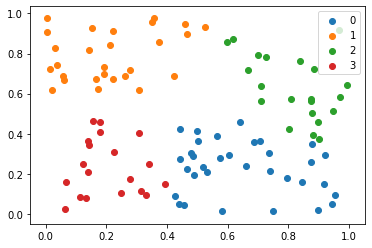

In [ ]:
data = np.random.rand(100,2) # 100 random points
data = pd.DataFrame(data)
k = 4 # we want 4 clusters
points, centroids = k_means(k, data)



for i in range(k):
    # points == i is similar to above
    plt.scatter(data[points == i][0],data[points==i][1], label = i)

plt.legend()
plt.show()